In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

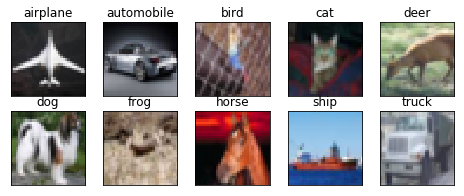

In [12]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [13]:
train_features.shape

(50000, 32, 32, 3)

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [31]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_19 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_20 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 15, 15, 96)        41568     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=390, epochs=100)`
  app.launch_new_instance()


Epoch 1/100
390/390 [==============================] - 11s 28ms/step - loss: 1.8410 - acc: 0.2922 - val_loss: 1.4151 - val_acc: 0.4731

Epoch 00001: val_acc improved from -inf to 0.47310, saving model to Best_weights.hdf5
Epoch 2/100
390/390 [==============================] - 9s 24ms/step - loss: 1.3459 - acc: 0.5140 - val_loss: 1.1316 - val_acc: 0.5947

Epoch 00002: val_acc improved from 0.47310 to 0.59470, saving model to Best_weights.hdf5
Epoch 3/100
390/390 [==============================] - 9s 23ms/step - loss: 1.1088 - acc: 0.6100 - val_loss: 0.9338 - val_acc: 0.6688

Epoch 00003: val_acc improved from 0.59470 to 0.66880, saving model to Best_weights.hdf5
Epoch 4/100
390/390 [==============================] - 9s 23ms/step - loss: 0.9720 - acc: 0.6610 - val_loss: 0.8220 - val_acc: 0.7183

Epoch 00004: val_acc improved from 0.66880 to 0.71830, saving model to Best_weights.hdf5
Epoch 5/100
390/390 [==============================] - 9s 23ms/step - loss: 0.8651 - acc: 0.7006 - val_los

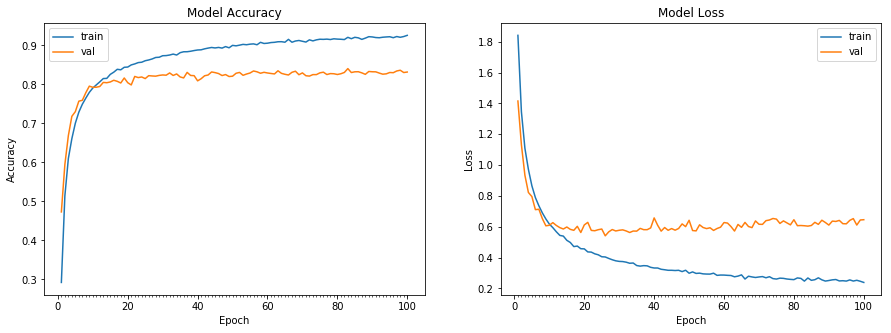

Accuracy on test data is: 83.19


In [33]:
from keras.callbacks import ModelCheckpoint
filepath="Best_weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels),callbacks=[checkpoint], verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
def ConvReluBn(model,size=32,kernelSize=(3,3),dout=0):
  
  model.add(Convolution2D(size, kernel_size=kernelSize,border_mode='same',activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(dout))
  return model
  

  

In [27]:
model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='same', activation='relu',input_shape=(32, 32, 3)))

model=ConvReluBn(model,size=64,dout=0.25)
model=ConvReluBn(model,size=128,dout=0.25)

# model.add(Convolution2D(64,1,1,activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))


model=ConvReluBn(model,size=128,dout=0.25)
model=ConvReluBn(model,size=256,dout=0.25)
# model=ConvReluBn(model,size=512,dout=0.25)

# model.add(Convolution2D(64,1,1,activation='relu'))
model=ConvReluBn(model,size=64,kernelSize=(1,1),dout=0)

model.add(MaxPooling2D(pool_size=(2, 2)))

model=ConvReluBn(model,size=128,dout=0.25)
model=ConvReluBn(model,size=256,dout=0.15)

model=ConvReluBn(model,size=64,kernelSize=(1,1),dout=0)

model=ConvReluBn(model,size=64,dout=0.15)
model.add(Convolution2D(64,3,3))
model.add(Convolution2D(10,6,6))





model.add(Flatten())
model.add(Activation('softmax'))



model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, kernel_size=(3, 3), activatio

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_20 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
batch_normalization_11 (Batc (None, 32, 32, 128)       512       
_________________________________________________________________
dropout_21 (Dropout)         (None, 32, 32, 128)       0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=390, epochs=100)`
  app.launch_new_instance()


Epoch 1/100
390/390 [==============================] - 76s 194ms/step - loss: 1.5944 - acc: 0.4469 - val_loss: 1.7751 - val_acc: 0.4846

Epoch 00001: val_acc improved from -inf to 0.48460, saving model to Best_weights.hdf5
Epoch 2/100
390/390 [==============================] - 68s 175ms/step - loss: 1.0445 - acc: 0.6306 - val_loss: 1.0839 - val_acc: 0.6447

Epoch 00002: val_acc improved from 0.48460 to 0.64470, saving model to Best_weights.hdf5
Epoch 3/100
390/390 [==============================] - 66s 169ms/step - loss: 0.8266 - acc: 0.7084 - val_loss: 0.9329 - val_acc: 0.6918

Epoch 00003: val_acc improved from 0.64470 to 0.69180, saving model to Best_weights.hdf5
Epoch 4/100
390/390 [==============================] - 66s 170ms/step - loss: 0.7012 - acc: 0.7556 - val_loss: 0.8038 - val_acc: 0.7292

Epoch 00004: val_acc improved from 0.69180 to 0.72920, saving model to Best_weights.hdf5
Epoch 5/100
390/390 [==============================] - 66s 170ms/step - loss: 0.6270 - acc: 0.7801 

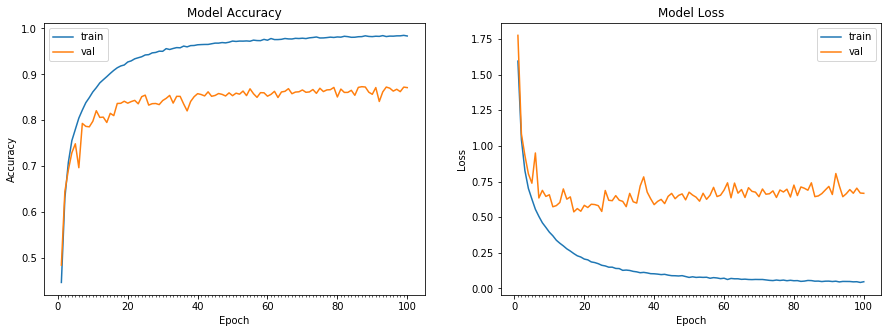

Accuracy on test data is: 87.11


In [29]:
from keras.callbacks import ModelCheckpoint
filepath="Best_weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels),callbacks=[checkpoint], verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))